In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D
import itertools
from lib import *
%matplotlib notebook

![title](ML2.png)

# Comment ça marche?

Dans l'exercise qui suit, certaine lignes de code sont déjà données, d'autre sont à écrire par vos soin. 
Concernant les lignes déjà données, il n'est pas nécessaire de les comprendre complétement pour faire l'exercise. Vous pouvez simplement les parcourirs, les admettre et passer à la suite! Si vous êtes intrigués, vous pouvez aussi poser des questions a leur propos.

# Descripteurs, mesures, predictions, modèle

Une fonction affine est une fonction de la forme:
\begin{align}
f(x)=ax+b
\end{align}

Supposons que nous étudions une propriété physique **mesurée** $y$ qui dépend linéairement d'une autre propriété **descriptive** $x$. Par exemple, $x$ pourrait être la concentration de nanotubes de carbonne dans un alliage métalique et $y$ la solidité de l'alliage.

Le **descripteur** $x$ est une quantité que nous pouvons choisir, et la **mesure** $y$ est une quantité que nous pouvons mesurer expérimentalement ou simuler. Les constantes $a$ et $b$ sont des paramètres du **modèle** que nous ne connaisons pas à priori car le systême est trop compliqué pour les déduire. 
Cependant, si nous avons assez de données $x$ et $y$, nous pouvons les **apprendre** avec des algorithmes. On peut ensuite utiliser le modèle pour **prédire** les valeurs de y associer à de nouvelles valeurs du descripteur $x$. Par exemple, nous connaissons la solidité de l'alliage pour les concentrations en nanotubes $0.12\%$, $0.47\%$ et $0.83\%$, et nous aimerions prédire la solidité d'un alliage avec une concentration $0.24\%$.

La fonction ci-dessous génére un nombre aléatoire $a\in [mini;maxi]$, qui fera office de paramètre du modèle inconnu à priori.

In [2]:
# À regarder
def aleat(mini,maxi):
    return (maxi-mini)*np.random.random()+mini

Définir un vecteur $x$ contenant une dizaine de valeurs aléatoire dans l'interval $[0;1]$, une fonction affine avec $b=0$ et $a \in [1;5]$ généré aléatoirement.
Calculer $y=f(x)$ et tracer les points (x,y) avec la fonction plt.scatter. 

<IPython.core.display.Javascript object>


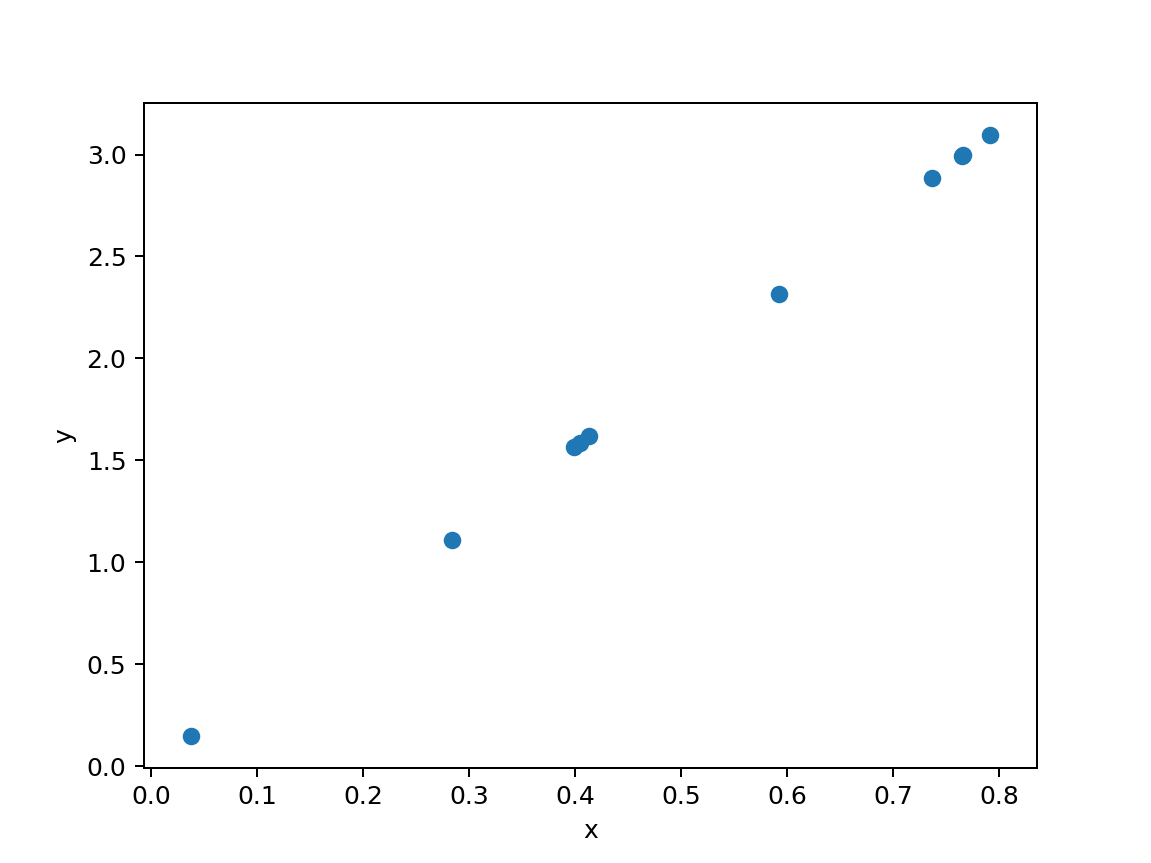

In [3]:
# À faire
a=aleat(5,1)
x=np.random.random(10)
y=a*x

#plot
fig=plt.figure()
ax=fig.add_subplot(111, xlabel='x',ylabel='y')
ax.scatter(x,y)
plt.show()

Retrouver la valeur de $a$ à partir des valeurs de $x$ et $y$ (sans faire "print(a)"!!).
Pour vérifier, tracer la ligne représentant la fonction affine $f(x)=ax$ avec plt.plot, en plus des points (x,y).

<IPython.core.display.Javascript object>


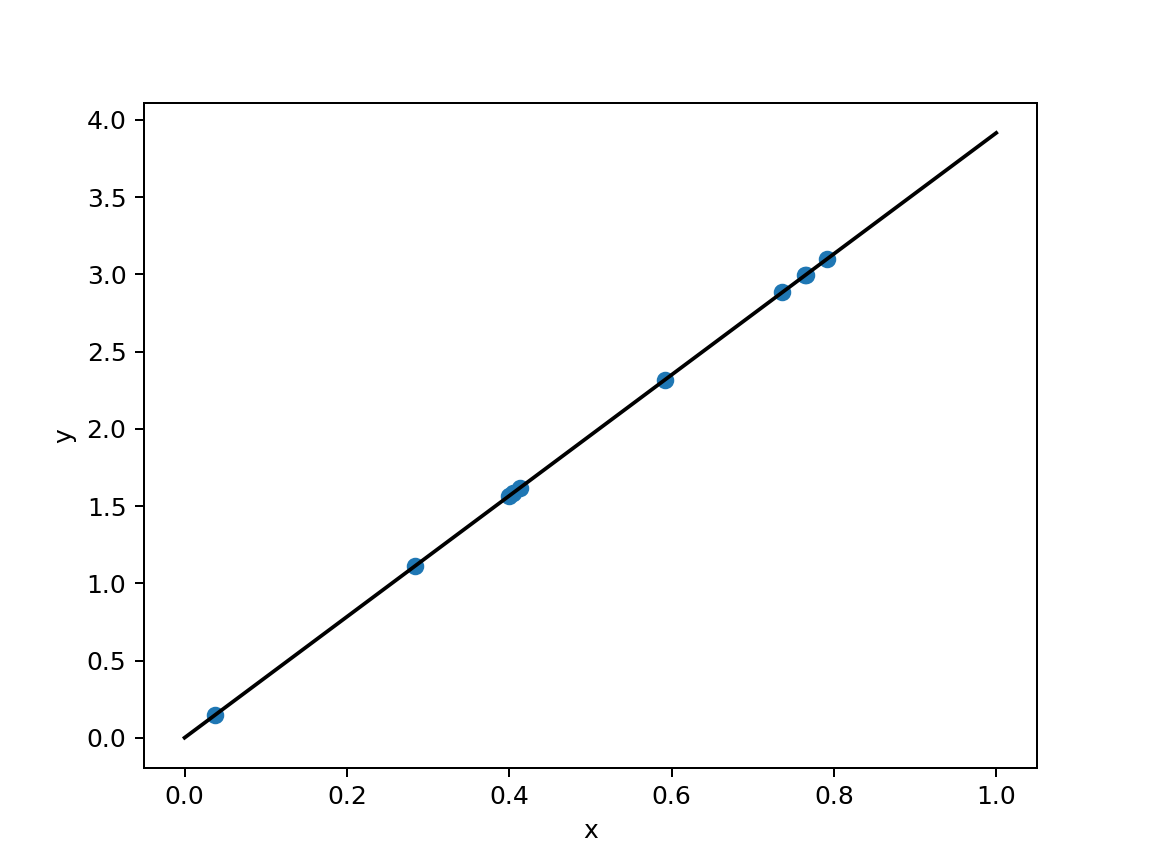

In [4]:
# À faire
pente=(y[0]/x[0])
xx=np.linspace(0,1,10)
yy=pente*xx

#plot
fig=plt.figure()
ax=fig.add_subplot(111, xlabel='x',ylabel='y')
ax.plot(xx,yy, color='k')
ax.scatter(x,y)
plt.show()

# Régression linéaire

En pratique, les choses ne collent pas aussi bien... $f$ ne représente pas parfaitement la réalité, c'est un **modèle**. D'autres facteurs peuvent affecter les **mesures** $y$. Par exemple, pour une même concentration de nanotubes de carbone, leur disposition peut varier suivant les détails de la préparation de l'alliage. Ceci ajoute de bruit aux données.

Ci-dessous, on utilise la fonction "aff_bruit" qui génére des points $y$ avec du bruit. Tracer $y$ en fonction de $x$ en nuage de points pour voir ce que cela donne.

<IPython.core.display.Javascript object>


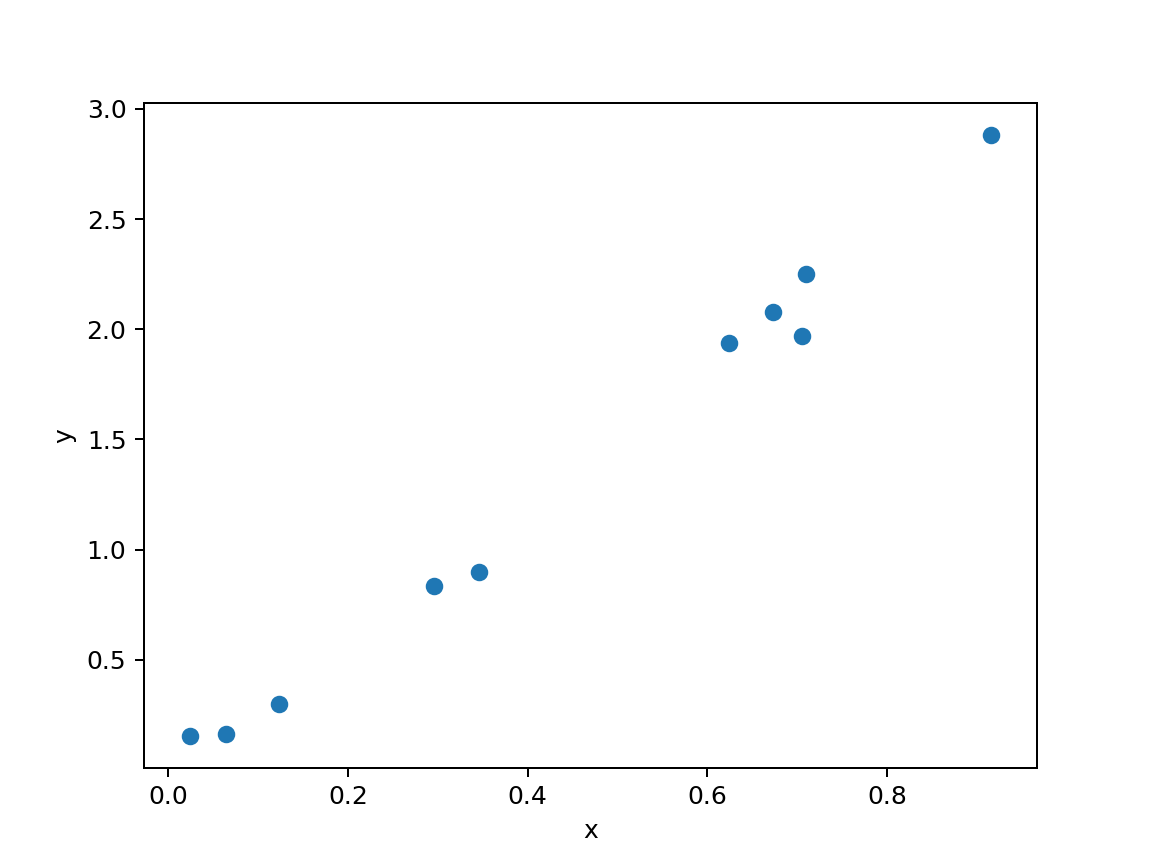

In [5]:
# À Regarder
a=aleat(1,5)
x=np.random.random(10)
y=aff_bruit(a,x)

#
fig=plt.figure()
ax=fig.add_subplot(111,xlabel='x',ylabel='y')
ax.scatter(x,y)
plt.show()

La cellule ci-dessous trace une fonction affine dont la pente est un nombre entier $a$ réglable. Faire glisser la barre ci-dessous pour changer la pente de la droite tracée et estimer la valeur de $a$ qui représente le mieux les données, et qui permettrait de faire la meilleure prédiction.

In [6]:
# À regarder puis jouer avec
@interact(a=2)
def plot_line(a):
    fig=plt.figure()
    ax=fig.add_subplot(111,xlabel='x',ylabel='y')
    ax.scatter(x,y)
    xx=np.linspace(0,1,3)
    ax.plot(xx,a*xx)
    plt.show()
    return

A Jupyter Widget

Ici, nous avons effectuer (à l'oeil) une **régression linéaire**. On a estimé le paramètre du modèle qui reproduit au mieux les données, c'est à dire qui minimise la distance entre les **prédictions** $ax$ et les **mesures** $y$. 

On va maintenant rendre cette procédure plus systématique, en commençant par définir un **coût** comme la distance entre prédictions et mesures:
\begin{equation}
S(a)=\sum_i (y_i-ax_i)^2 
\end{equation}
où $x_i$ et $y_i$ correspondent aux valeurs de $x$ et $y$ pour chaque point de données dont on dispose.

Pourquoi utilise-t-on la différence au carré?

Écrire une fonction "cout" qui calcule la quantité $S(a)$, en comparant une fonction affine de pente a et les mesures $y$.
Tracer la courbe correspondant à $S(a)$ pour $a \in [1;7]$

<IPython.core.display.Javascript object>


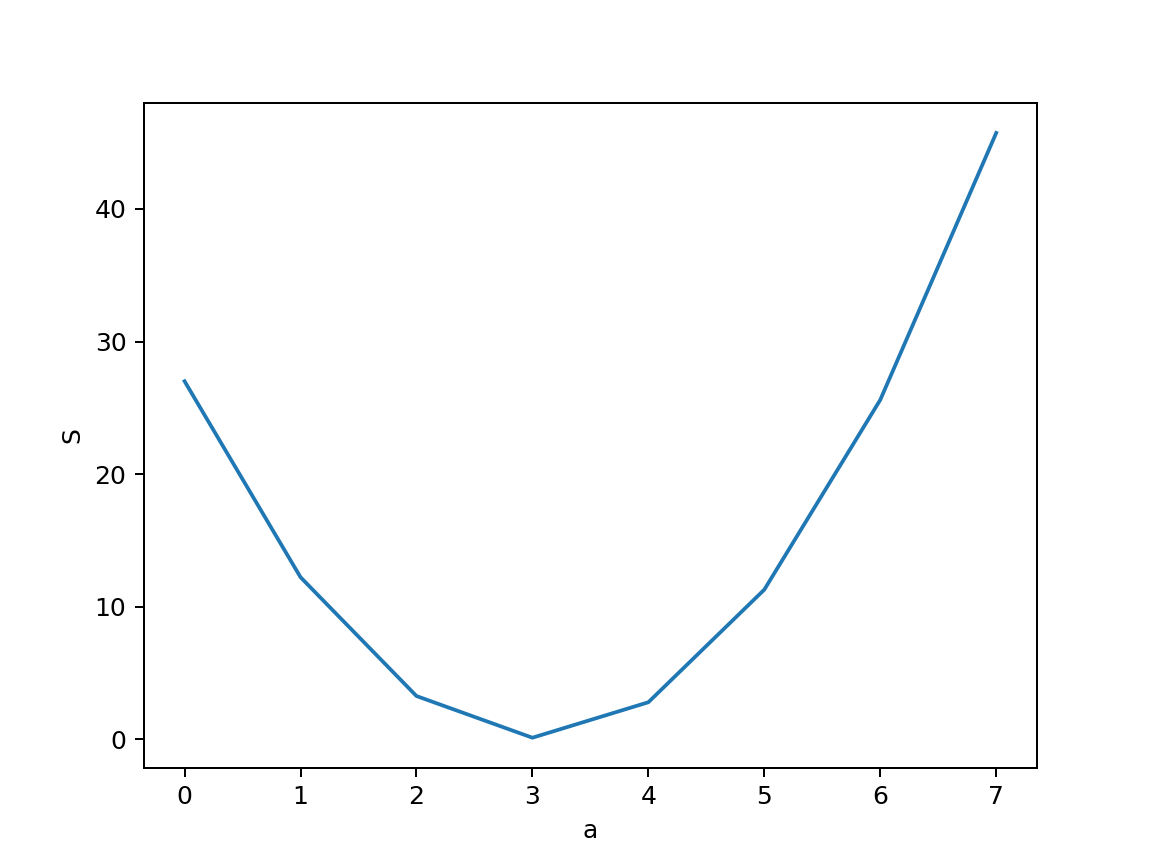

In [7]:
# À faire
def cout(a,x, y):
    yn=a*x
    return np.sum((y-yn)**2)

# plot
pentes=[0,1, 2, 3, 4, 5, 6, 7]
couts=[]
for p in pentes:
    couts.append(cout(p,x,y))
fig=plt.figure()
ax=fig.add_subplot(111,xlabel='a',ylabel='S')
ax.plot(pentes, couts)
plt.show()

Nous devons maintenant miniser le **coût** $S(a)$, c'est-à-dire trouver la pente $a$ qui donne la plut petite erreur. 
Écrire une fonction qui, à partir d'une list de pentes à essayer et des points $x$ et $y$ , trouve la meilleures pente dans la liste, c'est à dire celle qui donne le plus petit coût.

In [8]:
# À faire
def meilleure_pente(a_list,x,y):
    ma=a_list[0]
    co_min=cout(ma, x, y)
    for a in a_list[1:]:
        co=cout(a,x,y)
        if co<co_min:
            ma=a
            co_min=co
    return ma            # one liner : min(a_list, key= lambda a: cout(a,x,y))

#test
print(meilleure_pente([0.,1.0,2.0,3.0,4.0],x,y),meilleure_pente([2.8,3.0,3.2, 3.3, 3.4],x,y))

3.0 3.0


Nous allons effectuer une régression linéaire simplifiée comme suit:
- Partir d'un interval donné.
- Prendre $N$ valeur de pente equidistantes dans cette interval.
- Trouver la meilleure en utilisant la fonction ci-dessus.
- Recommencer en prenant comme nouvel interval celui défini par les 2 valeurs de pente autour de la meilleure 

L'algorithme s'arretera lorsque on sait que la meilleure pente se trouve dans un interval plus petit qu'un certain palier.
Ecrire les fonctions nécessaires. Ajouter un compteur qui copmte le nombre total de pentes essayées, ce qui nous donnera une idée du coup de notre algorithme.
Est-t-il une bonne idée de prendre $N$ grand? 

In [9]:
# À faire, avec les comentaires en indications, et éventuellement des 
# squelletes d'algorithme du genre:
# def f(x,y):
#    init=
#    for x in ...:
#       ...
#       while x<init:
#          ....
# return y

# fonction pour générer N pentes dans un interval donné:
# inputs:  rng=[low,high], N
# outputs: alist=[a1, a2, ..., aN] compris dans l'interval [low,high] 
# et régulièrement espacés
def a_list(rng, N):
    return np.linspace(rng[0],rng[1],N)

# fonction pour trouver la difference entre 2 pentes consecutives 
# générées par a_list:
# inputs:  rng=[low,high], N
# outputs: différence entre 2 pentes consécutives
def Da(rng, N):
    return abs(rng[1]-rng[0])/(N-1)

# régression linéaire: 
# inputs: données x et y, un palier thr, un interval initial init_rng, 
#         le nombre de pentes à prendre dans chaque interval N
# imprimer la veleur du compteur
# outputs: la pente trouvée ma
def simple_rl(x,y,thr, init_rng, N):
    # initialisation
    rng=init_rng
    compte=0
    # Da
    # Boucle while, qui s'arrête lorsque la difference entre 2 pentes consécutives est 
    # plus petite que thr.
    while Da(rng,N) > thr:
        # on génére la liste des pentes à essayer
        alist= a_list(rng, N)
        # on les essaye et on trouve la meilleure
        ma=meilleure_pente(alist,x,y)
        # compteur
        compte+=len(alist)
        # on met à jour l'interval en le rétrécissant à plus ou moins Da autour 
        # de la meilleure pente.
        rng=[ma-Da(rng,N),ma+Da(rng,N)]
    print(compte," pentes essayées")
    return ma

In [10]:
simple_rl(x,y,0.0001,[1.,5.],7)

49  pentes essayées


3.0401420043235952

In [11]:
simple_rl(x,y,0.0001,[1.,5.],20)

80  pentes essayées


3.0401052631578946

# Variable multi-dimensionelle

Supposons maintenant que la propriété que nous voulons prédire $y_i$ dépend de 2 variables descriptives $x_{1,i}, x_{2,i}$. Par exemple, la solidité de l'alliage dépend de la concentration et de la longueur moyenne des nanotubes de carbone. On dit que notre variable descriptive $x$ a 2 dimensions. Elle peut sera représentée comme un "array" composé d'"array":

    x1=np.random.random(Nx)
    x2=np.random.random(Nx)
    x=np.array([x1, x2])

On suppose toujours que l'on peut approximativement représenter leur relation linéairement, en faisant la somme des 2 fonctions affines : 
\begin{align}
y_i&\approx a_1 x_{1,i}+a_2 x_{2,i} \\
\end{align}
notre pente a elle ausse 2 dimensions:

    a=np.array([a1,a2])
Ci-dessous, on génére 2 pentes aléatoires $a_1$ et $a_2$ (toujours entre $1$ et $5$), et 100 valeurs de $x_1$ et $x_2$ aléatoires entre $0$ et $1$, et les valeurs de $y$ correspondantes avec du bruit.    

In [ ]:
# À regarder
Nx = 100
a = np.array([aleat(1,5), aleat(1,5)])
x = np.array([np.random.random(Nx),np.random.random(Nx)])
y = aff_bruit2D(a,x)

La distance des prédictions aux mesures est défini de la même manière, mais elle dépend cette fois de 2 paramètres:
\begin{align}
S(a_1, a_2)&=\sum_i (y_i-(a_1 x_{1,i}+a_2 x_{2,i}))^2
\end{align}
Pour effectuer une régression linéaire et trouver les meilleures valeurs de $a_1$ et $a_2$, on doit toujours minimiser la coût $S(a_1, a_1)$. 

Ecrire une fonction "cout2d" qui calcule $S(a_1, a_1)$ pour une fonction $f$ à 2 variables.

In [12]:
# À faire
def cout2d(a,x, y):
    yn=a[0]*x[0]+a[1]*x[1]
    return np.sum((y-yn)**2)

Générer 2 listes de pentes à essayer, et calculer $S(a_1, a_2)$ pour chaque couple de pente parmis ces listes. Tracer ensuite, dans un plot 3D, la surface associée à la fonction $S(a_1, a_2)$ pour des valeurs de $a_1$ et $a_2$ entre $1$ et $5$.

<IPython.core.display.Javascript object>


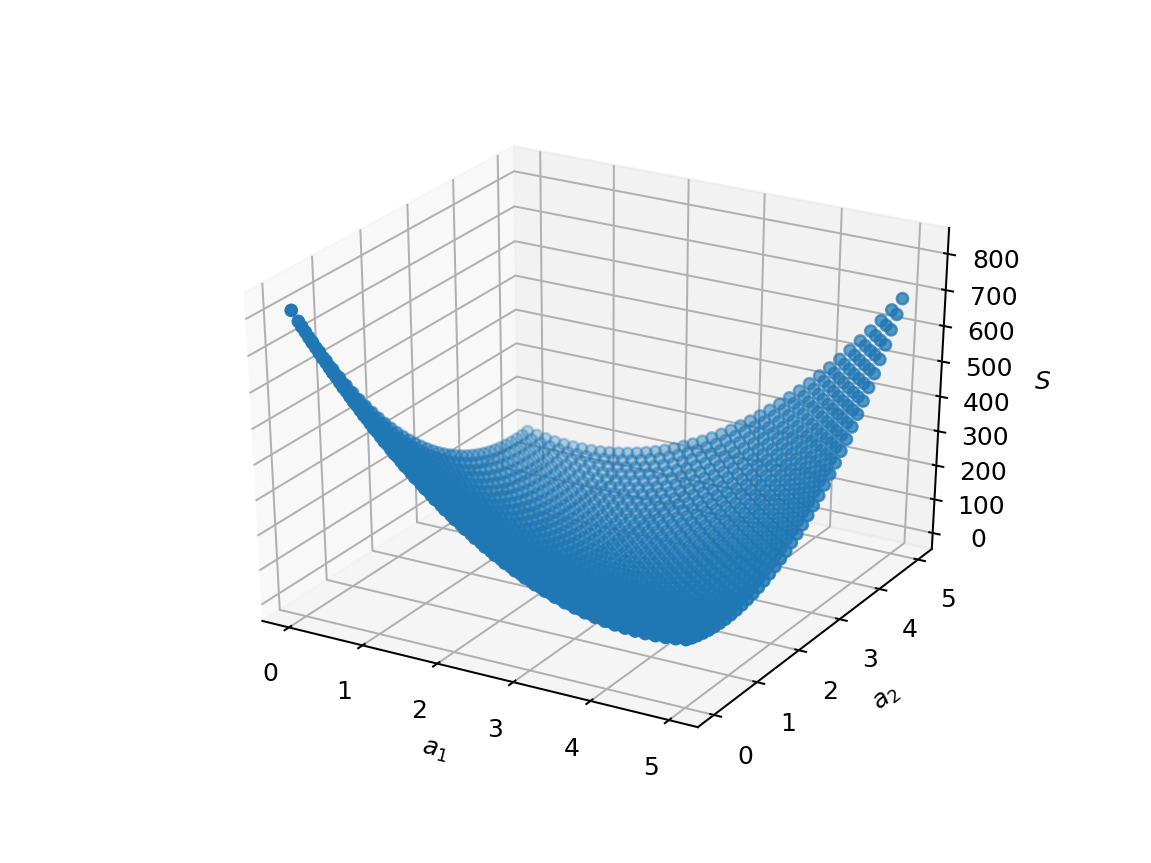

In [17]:
# À faire
pentes=np.linspace(0,5,40)
xp=[]
yp=[]
zp=[]
for p1 in pentes:
    for p2 in pentes:
        co=cout2d([p1,p2],x,y)
        xp.append(p1)
        yp.append(p2)
        zp.append(co)
#oneliner: data = np.array([ [p1,p2,cout2d([p1,p2],x,y)] for p1,p2 in itertools.product(pentes, pentes)] )
# xp,yp,zp = data[:,0],data[:,1],data[:,2]

# plot
fig=plt.figure()
ax=plt.subplot(111,projection='3d',xlabel=r'$a_1$',ylabel=r'$a_2$',zlabel=r'$S$')
ax.scatter(xp,yp,zp)
plt.show()

Adapter la regression linéaire écrite plus haut pour gérer un descripteur à 2 dimensions.

In [18]:
# À faire (un copier/coller de l'algorithme précédent avec quelques modifications)
def meilleure_pente2D(alist,x,y):
    a_init=np.array([0.,0.]) 
    petitcout=cout2d(a_init,x,y)
    meilleur=a_init
    for a1 in alist[0]:
        for a2 in alist[1]:
            c=cout2d([a1, a2], x,y)
            if c < petitcout:
                petitcout=c
                meilleur=np.array([a1,a2])
    return meilleur
def Da2D(rng, N):
    return [abs(rng[0][1]-rng[0][0])/N,abs(rng[1][1]-rng[1][0])/N]
def simple_rl2D(x,y,thr, init_rng, N):
    rng=init_rng
    compte=0
    while max(Da2D(rng,N)) > thr:
        alist=np.array([np.linspace(rng[0][0],rng[0][1],N), 
                        np.linspace(rng[1][0],rng[1][1],N)])
        ma=meilleure_pente2D(alist,x,y)
        compte+=N**2
        D=Da2D(rng,N)
        rng=[[ma[0]-D[0],ma[0]+D[0]],[ma[1]-D[1],ma[1]+D[1]] ]
    print(compte," pentes essayées")
    return ma

In [19]:
# À faire
print(a)
simple_rl(x,y,0.0001,[[-1,6.],[-1,6.]],7)

[ 2.10503802  3.08552747]
392  pentes essayées


array([ 2.17507586,  3.04516967])

Ce que l'on a fait pour 1 puis 2 dimensions du descripteur "$x$" peut être généralisé à $N_{d}$ dimensions. 
Voici une version à $N_{d}$ dimensions de l'algorithme utilisé jusqu'a present:

In [20]:
# À regarder
def coutNd(a,x, y):
    yn=sum(ai*xi for ai, xi in zip(a,x))
    return np.sum((y-yn)**2)

def meilleure_penteND(alist,x,y):
    petitcout=coutNd(alist[:,0],x,y)
    meilleur=alist[:,0]
    for ax in itertools.product(*alist):
            c=coutNd(ax, x,y)
            if c< petitcout:
                petitcout=c
                meilleur=np.array(ax)
    return meilleur
def DaND(rng, N):
    return [abs(r[1]-r[0])/N for r in rng]
def simple_rlD(x,y,thr, init_rng, N):
    rng=init_rng
    compte=0
    while max(DaND(rng,N)) > thr:
        alist=np.array([np.linspace(r[0],r[1],N) for r in rng])
        ma=meilleure_penteND(alist,x,y)
        compte+=N**len(alist)
        rng=[[b-D,b+D] for b,D in zip(ma, DaND(rng,N)) ]
    print(compte," pentes essayées")
    return ma

Ci dessous on génère $2000$ mesures pour un descripteur à 5 dimensions. 
Le modèle inclut 5 pentes aléatoires, et les mesures $y$ contiennent du bruit.

In [29]:
# À regarder
Nd=5
Np=2000
A=np.array([aleat(1,5) for i in range(Nd)])
X=np.array([np.random.random(Np) for i in range(Nd)])
Y=aff_bruitND(A,X,Nd)

Effectuer la régression linéaire et comparer les paramètre du modèle trouvées aux pentes générée.

In [30]:
# À faire
print(A)
mA=simple_rlND(X,Y,0.0001,[[1.,5.]]*Nd,7)
print(mA)

[ 1.64622318  4.17803089  1.45486774  4.2593355   1.83404845]
117649  pentes essayées
[ 1.61061292  4.19410563  1.50193938  4.23361298  1.83656186]


0.000882038608878


<IPython.core.display.Javascript object>


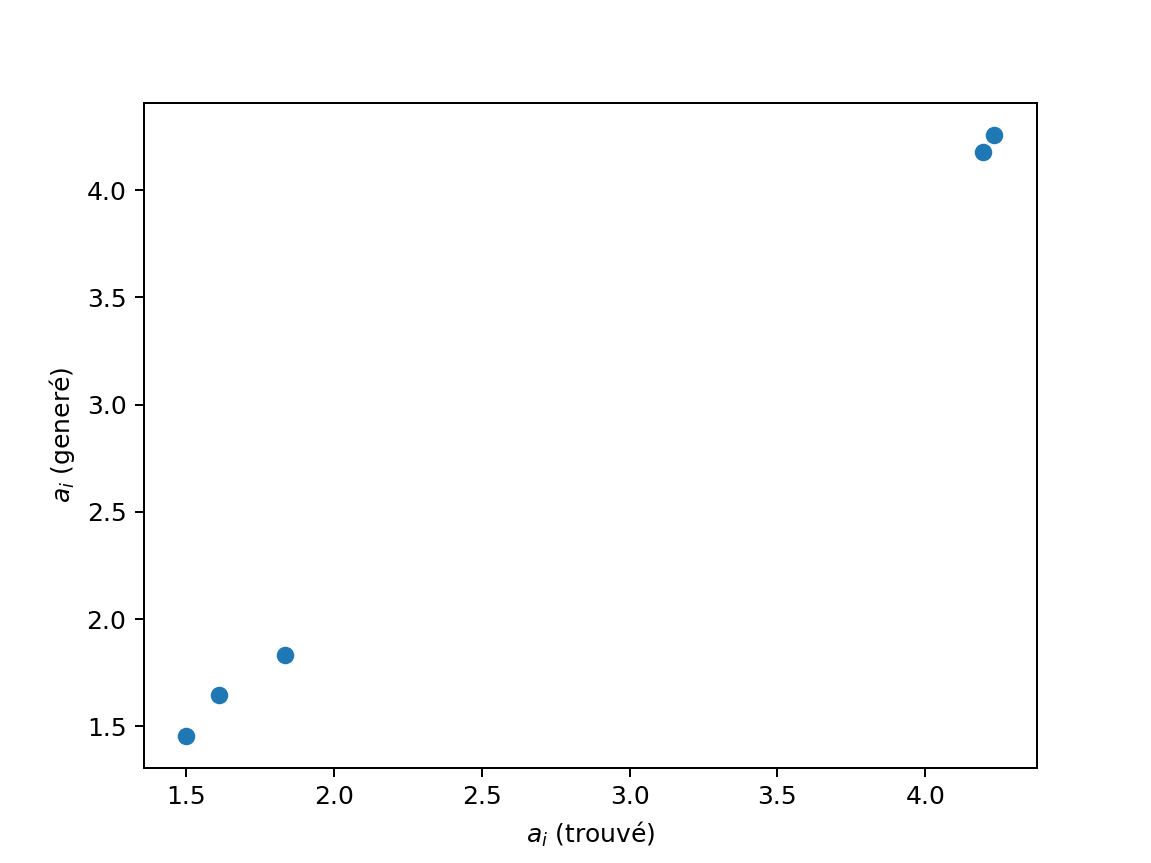

In [31]:
# À faire
print(np.sum((A-mA)**2)/Nd)
fig=plt.figure()
ax=plt.subplot(111,xlabel=r'$a_i$ (trouvé)',ylabel=r'$a_i$ (generé)')
ax.scatter(mA,A)
plt.show()

# Entrainement

Le nombre de points de données (descripteur+mesure) disponibles accroit la qualité de la régression linaire. Executer les cellules ci-dessous, en complétant simplement la liste "Nps", la liste du nombre de données à généner.

In [32]:
# À regarder
Nd=5
A=np.array([aleat(1,5) for i in range(Nd)])

<IPython.core.display.Javascript object>


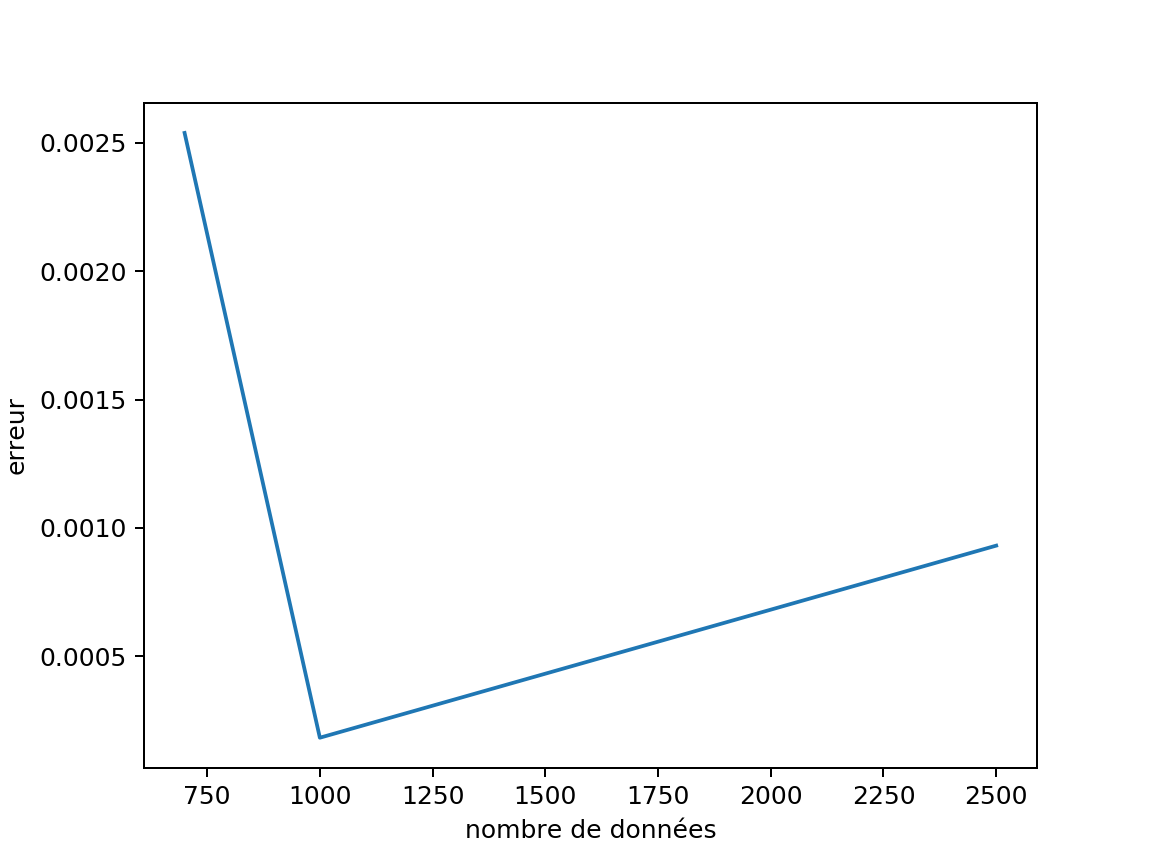

117649  pentes essayées
117649  pentes essayées
117649  pentes essayées


In [36]:
# À regarder (compléter simplement Nps)
fig=plt.figure()
ax=plt.subplot(111,xlabel=r'nombre de données',ylabel=r'erreur')
Nps=[ 700, 1000, 2500]
errors=[]
for Np in Nps:
    X=np.array([np.random.random(Np) for i in range(Nd)])
    Y=aff_bruitND(A,X,Nd)
    mA=simple_rlND(X,Y,0.0001,[[1.,5.]]*Nd,7)
    errors.append(np.sum((A-mA)**2)/Nd)
ax.plot(Nps,errors)
plt.show()

# Entrainement et test

On considère un descripteur à 5 dimensions prenant 1000 valeurs entre $0$ et $1$, ainsi que $1000$ valeures d'une mesure $y$ qui dépend linéairement des $x_i$ avec des pentes $a_i$ entre $1$ et $5$ à estimer.

In [43]:
# À regarder
Np=1000
Nd=5
A=np.array([aleat(1,5) for i in range(Nd)])
X=np.array([np.random.random(Np) for i in range(Nd)])
Y=aff_bruit_biaisND(A,X,Nd)

Nous séparons l'ensemble de 1000 points de données en 2 parties: 

- 800 points de données pour entrainer notre regression linéaire
- 200 points pour la tester

Comment choisir les données d'entrainement?
Commencer par simplement sélectionner les 800 premiers points de données. Effectuer la régression et la tester en plottant les prédictions et les valeurs de $y$ pour les 200 points de test sur le même graph. 

In [46]:
# À Faire
Ntr=800
Xtr=X[:,:Ntr]
Ytr=Y[:Ntr]
Xte=X[:,Ntr:]
Yte=Y[Ntr:]
mA=simple_rlND(Xtr,Ytr,0.0001,[[1.,5.]]*Nd,7)

117649  pentes essayées


<IPython.core.display.Javascript object>


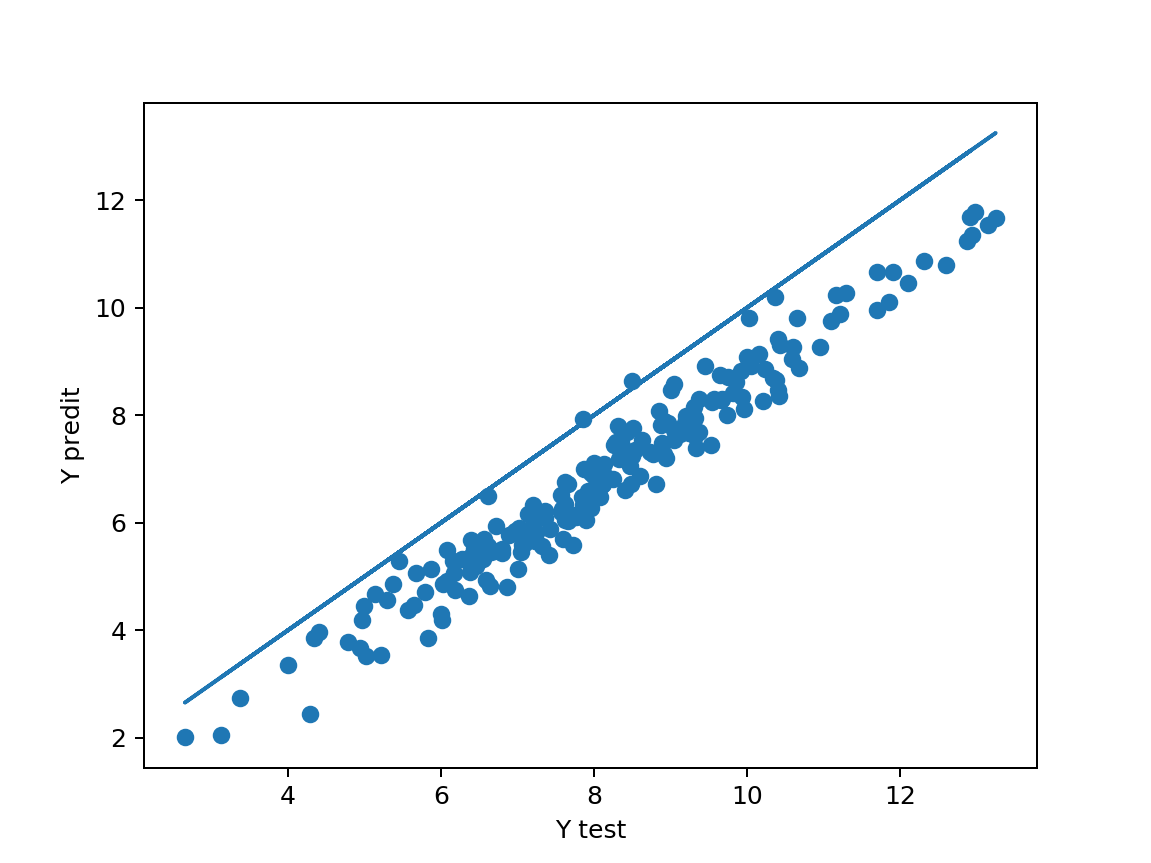

1.32317633987


In [49]:
# À faire
fig=plt.figure()
ax=plt.subplot(111,xlabel='Y test', ylabel='Y predit')
ax.scatter(Yte,np.dot(Xte.T,mA))
ax.plot(Yte, Yte)
print(np.sqrt(np.sum((Yte-np.dot(Xte.T,mA))**2)/len(Yte)))
plt.show()

La qualité de la régression n'est pas optimale. C'est parce que nos données sont légerement biaisées en fonction de leur position dans le vecteur. Comme nous ne prenons que le début du vecteur, la régression ne marche pas bien pour la fin. Pour remédier à cela, il suffit de choisir les 800 points d'entrainement au hasard.

In [50]:
# À regarder
indices = np.arange(Np)
np.random.shuffle(indices)
training_idx, test_idx = indices[:Ntr], indices[Ntr:]
Xtr, Xte = X[:,training_idx], X[:,test_idx]
Ytr, Yte = Y[training_idx], Y[test_idx]

Refaire la régression et observer l'améloriation.

117649  pentes essayées


<IPython.core.display.Javascript object>


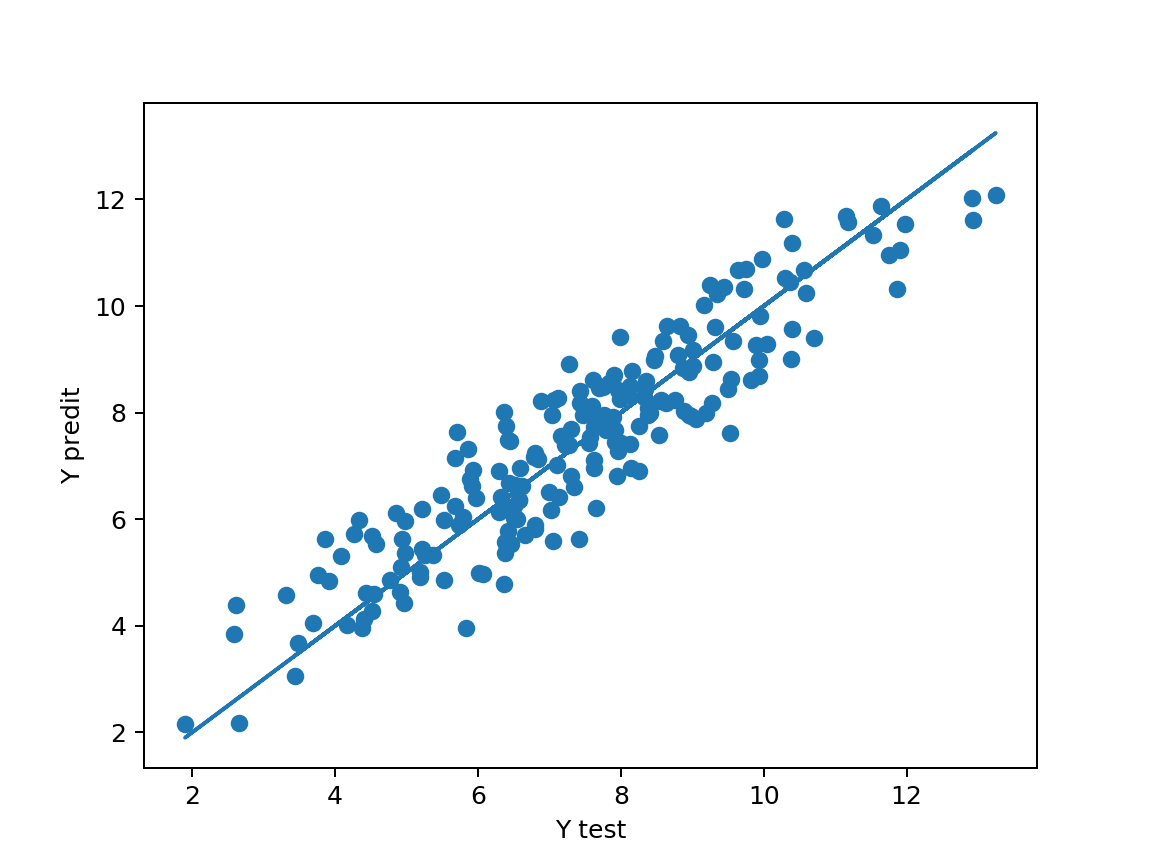

0.836715109651


In [52]:
# À faire
mA=simple_rlND(Xtr,Ytr,0.0001,[[1.,5.]]*Nd,7)
#
fig=plt.figure()
ax=plt.subplot(111,xlabel='Y test', ylabel='Y predit')
ax.scatter(Yte,np.dot(Xte.T,mA))
ax.plot(Yte, Yte)
print(np.sqrt(np.sum((Yte-np.dot(Xte.T,mA))**2)/len(Yte)))
plt.show()

Il faut utiliser suffisement de données d'entrainement. Ci-dessous, on boucle sur le nombre de données d'entrainement $Ntr$. Pour chaque $Ntr$, on effectue l'entrainement et le test, et on trace l'erreur en fonction de Ntr. Choisir la liste des tailles des ensembles d'entrainement à essayer Ntrs et observer comment l'errer sur le test diminue.

<IPython.core.display.Javascript object>


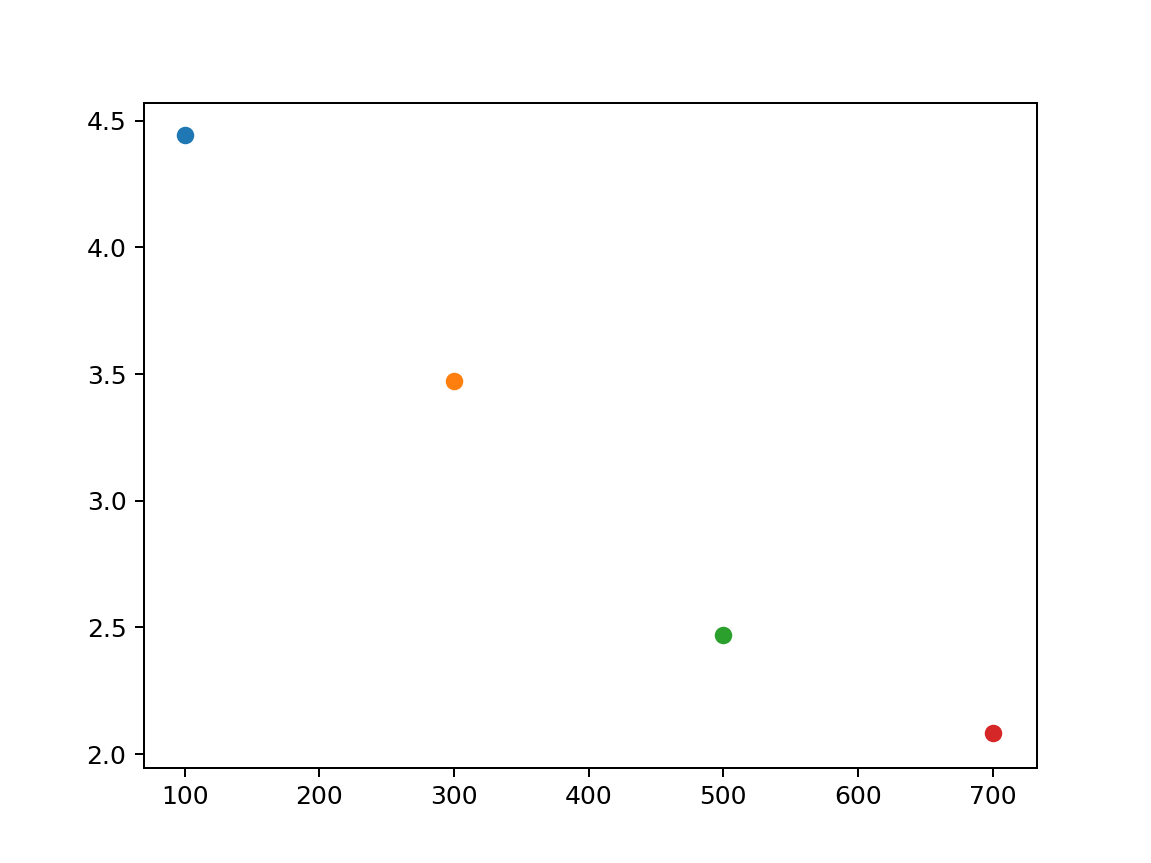

117649  pentes essayées
117649  pentes essayées
117649  pentes essayées
117649  pentes essayées


In [54]:
# À regarder (compléter simplement la liste de nombre de données d'entraienement Ntrs)
fig=plt.figure()
ax=plt.subplot(111)
Ntrs=np.arange(100, 900, 200)
for Ntr in Ntrs:
    Xtr=X[:,:Ntr]
    Ytr=Y[:Ntr]
    Xte=X[:,-100:]
    Yte=Y[-100:]
    mA=simple_rlND(Xtr,Ytr,0.0001,[[1.,5.]]*Nd,7)
    ax.scatter(Ntr,np.sum((Yte-np.dot(Xte.T,mA))**2)/len(Yte))
plt.show()

# Apprentissage Automatique

L'**apprentissage automatique** désigne le type de procédure que nous venons d'effectuer. À partir de l'analyse d'un grand nombre de données composées de **descripteurs** et de **mesures**, on laisse la machine apprendre à **prédire** les mesures pour de nouvelles valeurs des descripteurs à partir d'un **modèle**. On **entraine** et on **teste** l'apprenstissage pour en tirer un maximum d'infomartion. Bien sûr, le procédé peut s'améliorer (et se compliquer!) substantiellement:

- en construisant des descripteurs plus complexes 
- avec utilisant des modèles plus avancés
- en utilisant des algorithmes d'apprentissage plus évolués que la régression linéaire
- en augmentant considérablement la quantité de données
- ...



# Notes sur le côté plus formel

Il y a des méthodes plus formelles pour effectuer des régressions linéaires.

Si nous reprenons la version à une dimension:

Nous avons des points $x_i$ et des mesures $y_i$, et l'on suppose que l'on peut approximativement représenter leur relation avec une fonction affine (sans constante): 
\begin{align}
y_i&\approx cte \times x_i \\
\end{align}
Avec $a$, on obtient des prédictions $\hat{y}_i$
\begin{align}
\hat{y}_i&=a x_i\\
\end{align}
avec une erreur $\epsilon_i$ dont veut miniser la somme des carrés $S(a)$:
\begin{align}
\epsilon_i&=\hat{y}_i-y_i\\
S(a)&=\sum_i \epsilon_i^2
\end{align}
On doit trouver le minimum de la fonction $S(a)$. La fonction $S(a)$ est minimal lorsque sa dérivé par rapport à $a$ s'annule (voir le tracé de $S(a)$ plus haut)
\begin{align}
\frac{dS(a)}{da}&=\frac{d\sum_i \epsilon_i^2}{da}=0
\end{align}
En dérivant l'expression ci-dessus, on obtient:
\begin{align}
\frac{d\sum_i (y_i-a x_i)^2}{da}&=\sum_i x_i (y_i-a x_i)=0 \\
\sum_i x_i y_i&=a \sum_i x_i^2 \\
a&=\frac{\sum_i x_i y_i}{\sum_i x_i^2}
\end{align}
Vérifier que l'on trouve un nombre similaire avec cette formule.

De même pour la version à 2 dimensions

La fonction $S(a_1, a_2)$ est minimal lorsque sa dérivé par rapport à $a_1, a_2$ s'annule:
\begin{align}
\frac{dS(a_1)}{da}&=\frac{dS(a_2)}{da}=0
\end{align}
En dérivant les expressions ci-dessus, on obtient:
\begin{align}
\sum_i x_{1,i} (y_i-a_1 x_{1,i}-a_2 x_{2,i})=0 \\
\sum_i x_{2,i} (y_i-a_1 x_{1,i}-a_2 x_{2,i})=0 \\
\end{align}
Ce qui nous donne un système de 2 équations à 2 inconnues: 
\begin{align}
\sum_i x_{1,i}y_i=a_1 \sum_i x^2_{1,i}- a_2 \sum_i x_{1,i} x_{2,i} \\
\sum_i x_{2,i} y_i= a_1 \sum_i x_{2,i} x_{1,i}- a_2 \sum_i x^2_{2,i} \\
\end{align}
Il est alors plus pratique d'écrire le problème sous forme sous forme matricielle:
\begin{align}
\hat{Y}&= \hat{A} X\\
\end{align}
la minimisation des distances au carré revient à résoudre:
\begin{align}
0&=X^{T} (Y-\hat{A} X) \\
\hat{A} &= (X^{T} X)^{-1} X^{T}Y 
\end{align}
Cette dernière expression est générale et peut être appliquée à des dimensions plus élevées.

In [ ]:
Nvar=5
Np=2000
A=np.array([rand_in(1,5) for i in range(Nvar)])
X=np.array([np.random.random(Np) for i in range(Nvar)]).T
Y=np.dot(X,A)+Nvar*np.array([np.random.normal(scale=0.2) for i in range(Np)])
mA=np.dot( np.linalg.inv(np.dot(X.T,X)) , np.dot(X.T,Y) )

In [ ]:
print(A, mA)